In [1]:
#cho google colab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [3]:
new_file=open("car_data.txt",mode="w",encoding="utf-8")
columns = "mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name\n"
new_file.write(columns)

85

Viết file

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
file = urllib. request. urlopen(url)
for line in file:
    decoded_line = line.decode("utf-8")
    decoded_line = decoded_line.split('\t')
    decoded_line[0] = ','.join(decoded_line[0].split())
    decoded_line[1] = decoded_line[1].strip('\n')
    decoded_line = ','.join(decoded_line)
    #print(decoded_line)
    new_file.write(decoded_line + '\n')
new_file.close()

In [5]:
car_data = pd.read_csv('car_data.txt')
car_data.shape

(398, 9)

In [6]:
car_data = car_data.replace('?',np.NaN)
car_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
car_data[['cylinders','model year','origin']] = car_data[['cylinders','model year','origin']].astype('category')

In [9]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
car_data[car_data["mpg"] == max(car_data["mpg"])]  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc


In [11]:
car_data["origin"].unique()

[1, 3, 2]
Categories (3, int64): [1, 3, 2]

In [12]:
car_data.describe().round(2)

,mpg,displacement,weight,acceleration
count,398.00,398.00,398.00,398.00
mean,23.51,193.43,2970.42,15.57
std,7.82,104.27,846.84,2.76
min,9.00,68.00,1613.00,8.00
25%,17.50,104.25,2223.75,13.82
50%,23.00,148.50,2803.50,15.50
75%,29.00,262.00,3608.00,17.17
max,46.60,455.00,5140.00,24.80


In [13]:
car_data['mpg'].mean()

23.514572864321615

In [14]:
horsepower_df = car_data.loc[:,['horsepower']]
mean = car_data[['horsepower']].loc[~(car_data['horsepower'].isna())]['horsepower'].astype('float64').mean()
horsepower_df['horsepower'].loc[horsepower_df['horsepower'].isna()] = mean
horsepower_df['horsepower']= horsepower_df['horsepower'].astype('float64')

In [15]:

#car_data['horsepower'].loc[(car_data['horsepower'].isna())] = car_data[['horsepower']].loc[~(car_data['horsepower'].isna())]['horsepower'].astype('float64').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

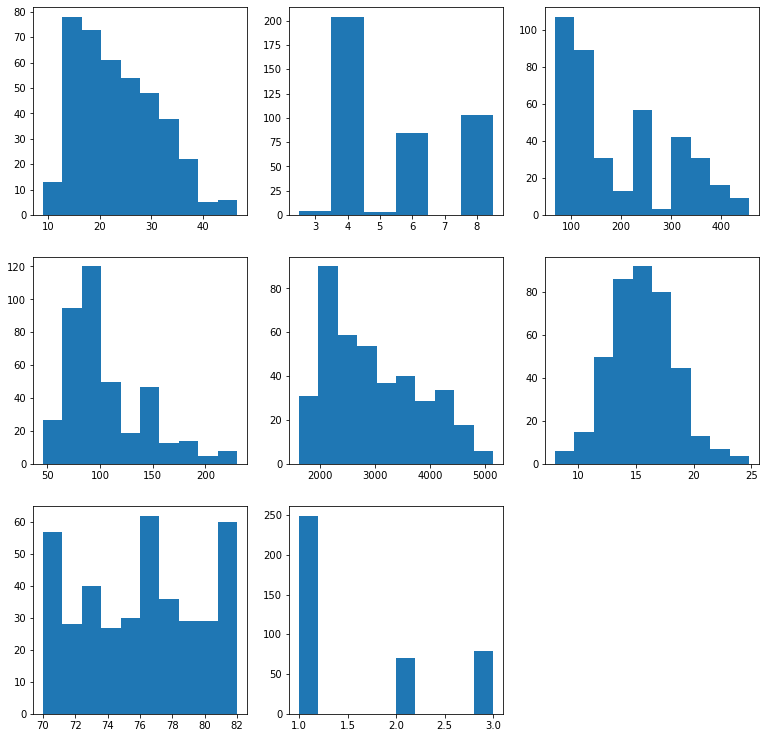

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(13, 13))
axs[0, 0].hist(car_data["mpg"])

bins = np.arange(3,10) - 0.5
axs[0, 1].hist(car_data["cylinders"].astype('int64'),bins)

axs[0, 2].hist(car_data["displacement"].astype('int64'))

axs[1, 0].hist(horsepower_df['horsepower'])

axs[1, 1].hist(car_data['weight'])

axs[1, 2].hist(car_data['acceleration'])

axs[2, 0].hist(car_data['model year'])

bins = np.arange(2,5) - 1
axs[2, 1].hist(car_data['origin'].astype('int64'))

axs[2, 2].axis('off')
plt.show

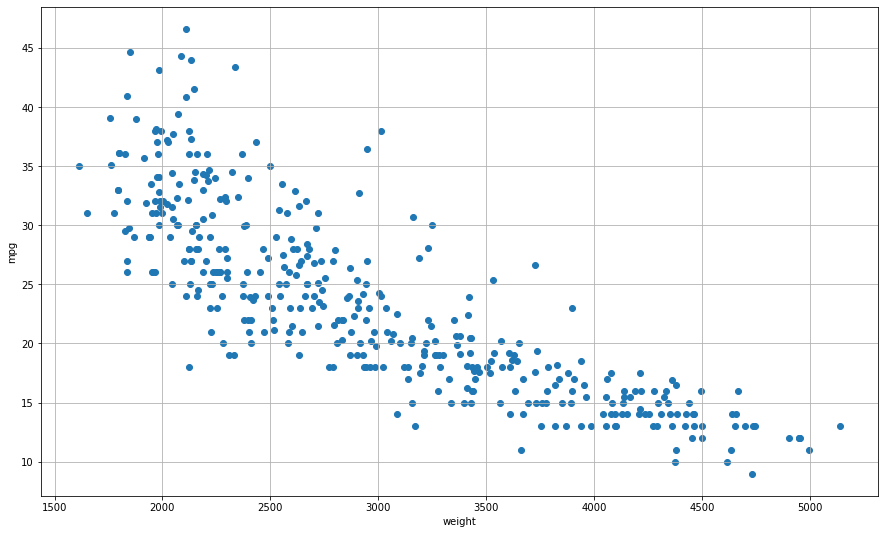

In [17]:
plt.figure(figsize = (15,9))
plt.scatter('weight', 'mpg', data=car_data)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.grid()
plt.show()

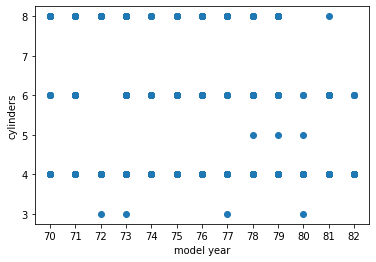

In [18]:
plt.scatter('model year' , 'cylinders', data=car_data)
plt.xlabel('model year')
plt.ylabel('cylinders')
plt.xticks(np.arange(min(car_data['model year']), max(car_data['model year'])+1, 1.0)) 

plt.show()

In [19]:
companies = car_data[['model year','origin','car name']]
b = companies.groupby(['origin','model year']).agg('count')

In [20]:
idx = b.index.levels
c = len(idx[1])
companies_years = pd.DataFrame(b.values.reshape(-1,c),index=idx[0].values, columns=idx[1].values)

In [21]:
companies_years.index

CategoricalIndex([1, 2, 3], categories=[1, 2, 3], ordered=False, dtype='category')

In [22]:
companies_years.iloc[[0]]

,70,71,72,73,74,75,76,77,78,79,80,81,82
1,22,20,18,29,15,20,22,18,22,23,7,13,20


In [23]:
np.arange(min(companies_years.columns.values), max(companies_years.columns.values)+1, 1)

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

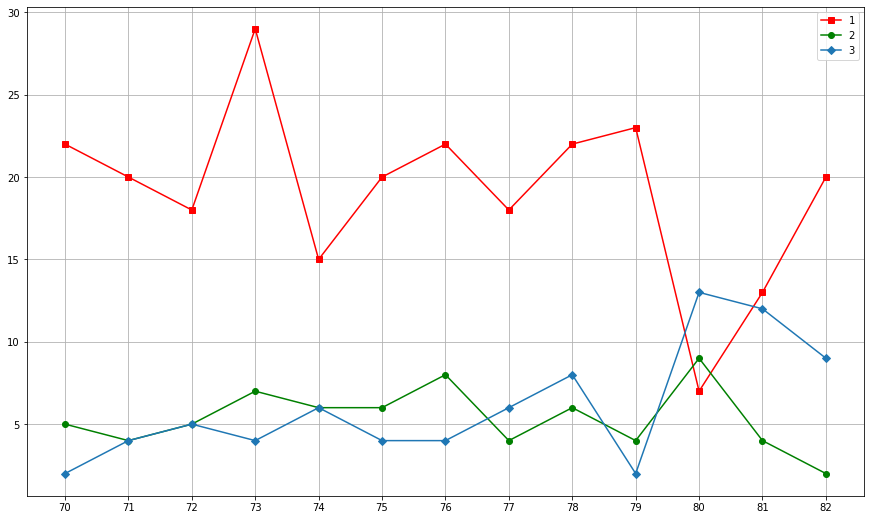

In [37]:
plt.figure(figsize = (15,9))
sign = ['r-s','g-o', 'D-']
plt.grid()
plt.xticks(np.arange(min(companies_years.columns.values), max(companies_years.columns.values)+1, 1))
for i in range(3):
    plt.plot(companies_years.columns.values,companies_years.iloc[i],sign[i], label = i+1)
plt.legend(loc='best')
plt.show()

In [39]:
car_data.iloc[0:8].corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.851016,-0.836546,0.695520
displacement,-0.851016,1.000000,0.990773,-0.862231
weight,-0.836546,0.990773,1.000000,-0.841443
acceleration,0.695520,-0.862231,-0.841443,1.000000
